
## 257 - Taming GRIB Files with XArray


[Youtube](https://www.youtube.com/watch?v=LYWfD_sFpK0)

<br>

[Download NWS GRIB Files](https://tgftp.nws.noaa.gov/SL.us008001/ST.opnl/DF.gr2/DC.ndfd/AR.conus/VP.001-003/) : ``ds.temp.bin`` and ``ds.apt.bin``

</br>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from metpy.units import units

In [2]:
ds = xr.load_dataset('ds.temp.bin', engine = 'cfgrib')
# ds

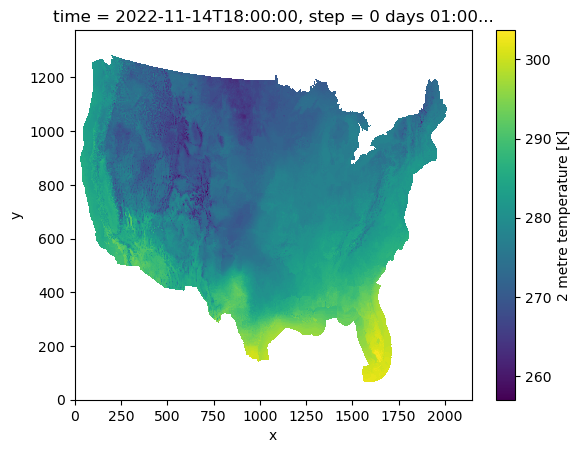

In [3]:
ds.t2m[0].plot()

In [4]:
data_var = ds.metpy.parse_cf('t2m')
data_var

/home/jessica/anaconda3/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.DataArray 't2m' (step: 42, y: 1377, x: 2145)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    time               datetime64[ns] 2022-11-14T18:00:00
  * step               (step) timedelta64[ns] 01:00:00 ... 2 days 06:00:00
    heightAboveGround  float64 2.0
    latitude           (y, x) float64 20.19 20.2 20.2 ... 50.12 50.11 50.11
    longitude          (y, x) float64 238.4 238.5 238.5 ... 299.1 299.1 299.1
    valid_time         (step) datetime64[ns] 2022-11-14T19:00:00 ... 2022-11-17
Dimensions without coordinates: y, x
Attributes: (12/33)
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      2953665
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                2 metre temperature
    GRIB_shortName:                           2t
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            air_temperature

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [6]:
crs = ccrs.LambertConformal()

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


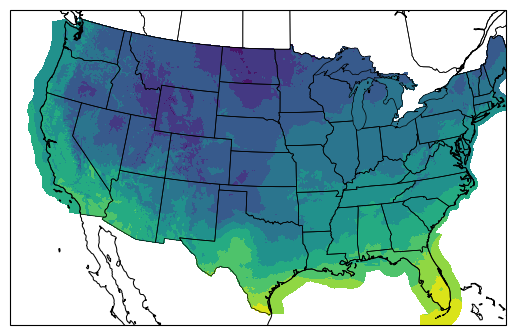

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = crs)
ax.set_extent((-122, -75, 25, 50), crs = ccrs.PlateCarree())

cs = ax.contourf(data_var.longitude, data_var.latitude, data_var.isel(step = 0), transform = ccrs.PlateCarree(), levels = np.arange(260, 310, 5))

ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth = 0.75)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

In [8]:
data_var.x

<xarray.DataArray 'x' (x: 2145)>
array([   0,    1,    2, ..., 2142, 2143, 2144])
Coordinates:
    time               datetime64[ns] 2022-11-14T18:00:00
    heightAboveGround  float64 2.0
Dimensions without coordinates: x

In [9]:
ds = xr.load_dataset('ds.apt.bin', engine = 'cfgrib')
ds

<xarray.Dataset>
Dimensions:            (step: 42, y: 1377, x: 2145)
Coordinates:
    time               datetime64[ns] 2022-11-14T18:00:00
  * step               (step) timedelta64[ns] 01:00:00 ... 2 days 06:00:00
    heightAboveGround  float64 2.0
    latitude           (y, x) float64 20.19 20.2 20.2 ... 50.12 50.11 50.11
    longitude          (y, x) float64 238.4 238.5 238.5 ... 299.1 299.1 299.1
    valid_time         (step) datetime64[ns] 2022-11-14T19:00:00 ... 2022-11-17
Dimensions without coordinates: y, x
Data variables:
    unknown            (step, y, x) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             8
    GRIB_centreDescription:  US National Weather Service - NWSTG 
    GRIB_subCentre:          65535
    Conventions:             CF-1.7
    institution:             US National Weather Service - NWSTG 
    history:                 2022-11-16T13:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [10]:
data_var = ds.metpy.parse_cf('unknown')
data_var

/home/jessica/anaconda3/lib/python3.9/site-packages/metpy/xarray.py:355: UserWarning: More than one time coordinate present for variable "unknown".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.DataArray 'unknown' (step: 42, y: 1377, x: 2145)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
    time               datetime64[ns] 2022-11-14T18:00:00
  * step               (step) timedelta64[ns] 01:00:00 ... 2 days 06:00:00
    heightAboveGround  float64 2.0
    latitude           (y, x) float64 20.19 20.2 20.2 ... 50.12 50.11 50.11
    longitude          (y, x) float64 238.4 238.5 238.5 ... 299.1 299.1 299.1
    valid_time         (step) datetime64[ns] 2022-11-14T19:00:00 ... 2022-11-17
Dimensions without coordinates: y, x
Attributes: (12/33)
    GRIB_paramId:                             0
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      2953665
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_name:                                unknown
    units:                                    unknown
    standard_name:                            unknown

In [11]:
ds = ds.rename({'unknown': 'apparent_temperature'})
ds

<xarray.Dataset>
Dimensions:               (step: 42, y: 1377, x: 2145)
Coordinates:
    time                  datetime64[ns] 2022-11-14T18:00:00
  * step                  (step) timedelta64[ns] 01:00:00 ... 2 days 06:00:00
    heightAboveGround     float64 2.0
    latitude              (y, x) float64 20.19 20.2 20.2 ... 50.12 50.11 50.11
    longitude             (y, x) float64 238.4 238.5 238.5 ... 299.1 299.1 299.1
    valid_time            (step) datetime64[ns] 2022-11-14T19:00:00 ... 2022-...
Dimensions without coordinates: y, x
Data variables:
    apparent_temperature  (step, y, x) float32 nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             8
    GRIB_centreDescription:  US National Weather Service - NWSTG 
    GRIB_subCentre:          65535
    Conventions:             CF-1.7
    institution:             US National Weather Service - NWSTG 
    history:                 2022-11-16T13:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
ds.apparent_temperature.data = ds.apparent_temperature.data * units('kelvin')
ds

Magnitude,[[[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]] [[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]] [[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]] ... [[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]] [[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]] [[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]]]
Units,kelvin


In [13]:
ds.apparent_temperature.attrs['GRIB_units'] = 'K'